# Clothes Classification with Neural Networks

In this notebook we are going to explore the Neural Networks for image classification. We are going to use the same dataset of the SVM notebook: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [39]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  0.21.2


In [40]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place a seed for the random generator (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [41]:
ID = 1055717
np.random.seed(ID)

In [72]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time. Make sure that each label is present at least 10 times
in training frequencies.

In [73]:
#random permute the data and split into training and test taking the first 600
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [50 58 55 66 54 63 62 61 69 62]


In [44]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


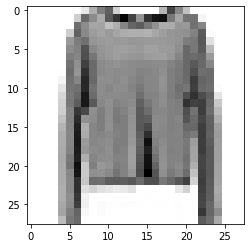

LABEL: 2
INPUT:


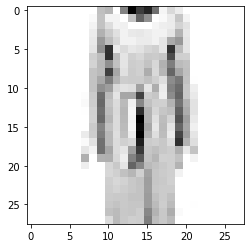

LABEL: 4
INPUT:


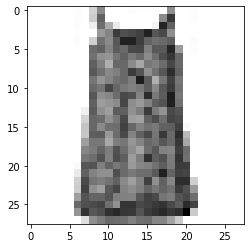

LABEL: 0


In [45]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,10000)

## TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [46]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(40,), (30,), (100,), (40,30,), (40,30,20) ]}

mlp = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)


mlp_test_layer = GridSearchCV(mlp, parameters, cv=5, return_train_score=True, iid=False)
mlp_test_layer.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:", mlp_test_layer.best_params_)

print("Score with best parameters:", mlp_test_layer.best_score_)

print("\nAll scores on the grid:", mlp_test_layer.cv_results_['mean_test_score']) 

RESULTS FOR NN

Best parameters set found: {'hidden_layer_sizes': (100,)}
Score with best parameters: 0.801427001559715

All scores on the grid: [0.79118264 0.7931075  0.801427   0.7746247  0.49881367]


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [47]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 32, 480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

mlp_best_layer = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4,
                    random_state=ID, learning_rate_init=.1)

# recall to use cv=kf in GridSearchCV parameters to use the k-fold subdivision seen in the lectures

mlp_test_batch = GridSearchCV(mlp_best_layer, parameters, cv=kf, return_train_score=True, iid=False)
mlp_test_batch.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:", mlp_test_batch.best_params_)

print("Score with best parameters:", mlp_test_batch.best_score_)

print("\nAll scores on the grid:", mlp_test_batch.cv_results_['mean_test_score'])

RESULTS FOR NN

Best parameters set found: {'batch_size': 480}
Score with best parameters: 0.7916666666666667

All scores on the grid: [0.105      0.75166667 0.79166667]


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]
About the layers I can say that single layers of big sizes give best performances and that multiple layers give the worst performances. About the batch sizes I can say that the baseline SGD is the worst and that between mini-batch size and standard GD there is not much difference (but the standard GD is still better). I didn't notice a failed convergence for batch sizes.

### TO DO 3

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate . 

/home/tobia/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/tobia/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/tobia/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/tobia/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

RESULTS FOR NN

Best parameters set found: {'learning_rate_init': 0.1}
Score with best parameters: 0.7916666666666667


/home/tobia/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/tobia/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/tobia/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


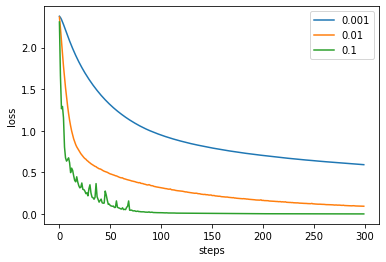

In [48]:
import matplotlib.pyplot as plt


lr_list = [10**exp for exp in range(-3,0)]
scores = {'learning_rate_init': lr_list}

mlp_best_layer_batch = MLPClassifier(hidden_layer_sizes=(100,), batch_size=480, max_iter=300, alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=ID)

mlp_test_lr = GridSearchCV(mlp_best_layer_batch, scores, cv=kf, return_train_score=True, iid=False)
mlp_test_lr.fit(X_train, y_train)


print ('RESULTS FOR NN\n')

print("Best parameters set found:", mlp_test_lr.best_params_)

print("Score with best parameters:", mlp_test_lr.best_score_)

plt.figure
for i in lr_list:
    mlp_best_layer_batch = MLPClassifier(hidden_layer_sizes=(100,), batch_size=480, max_iter=300, alpha=1e-4,
                    solver='sgd', n_iter_no_change=300, tol=1e-4, random_state=ID, learning_rate_init=i)
    mlp_best_layer_batch.fit(X_train, y_train)
    plt.plot(mlp_best_layer_batch.loss_curve_, label=np.str(i))
plt.xlabel('steps')
plt.ylabel('loss')
plt.legend()
plt.show()

### QUESTION 2

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 2]
In general the three curves indicate a decrease of the loss over the steps. Furthermore, as can be seen in the figure, the green curve (lr=0.1) is the one that converges more rapidly (the loss decreases rapidly over few steps) and indeed the blue curve (lr=0.001) doesn't even converge in the maximum iterations given (this can also be guessed by the warnings above). About the stability it seems that the green curve is less stable than the other two. Therefore I can say that a low learning rate is stable, but converges slowly, and an high learning rate is unstable, but converges fast.

### TO DO 4

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate)from above. Plot the learning curve also for this case.


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.207980


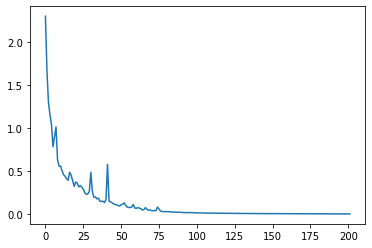

In [75]:
#get training and test error for the best NN model from CV

mlp_best = MLPClassifier(hidden_layer_sizes=(100,), batch_size=480, max_iter=300, alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=0.1)

mlp_best.fit(X_train, y_train)

training_error = 1. - mlp_best.score(X_train,y_train)
test_error = 1. - mlp_best.score(X_test,y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

plt.figure
plt.plot(mlp_best.loss_curve_)
plt.show()

## More data 
Now let's do the same but using 5000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer !!

In [76]:
X = X[permutation]
y = y[permutation]

m_training = 5000

X_train_larger, X_test_larger = X[:m_training], X[m_training:]
y_train_larger, y_test_larger = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train_larger, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [483 531 492 523 512 518 488 488 509 456]


## TO DO 5

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).


RESULTS FOR NN

NN training error: 0.016600
NN test error: 0.151164


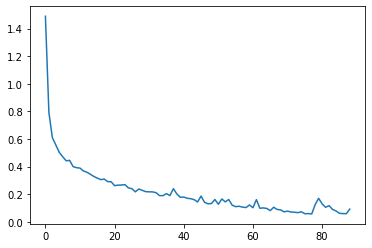

In [79]:
# use best architecture and params from before

mlp_best_larger = MLPClassifier(hidden_layer_sizes=(100,), batch_size=480, max_iter=300, alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=0.1)

mlp_best_larger.fit(X_train_larger, y_train_larger)

training_error = 1. - mlp_best_larger.score(X_train_larger,y_train_larger)
test_error = 1. - mlp_best_larger.score(X_test_larger,y_test_larger)

print ('\nRESULTS FOR NN\n')

print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)

plt.figure
plt.plot(mlp_best_larger.loss_curve_)
plt.show()

## QUESTION 3
Compare the train and test errors you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

## [ANSWER TO QUESTION 3]
The training error relative to the reduced sample (600 data points) is 0.0, but I think that this is due to the seed (this is just to say that I cannot compare the training error between the two samples). On the other hand the test error is lower for the larger sample (as I expected).

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=5000 training data points.

7
NN_prediction: 

INPUT:


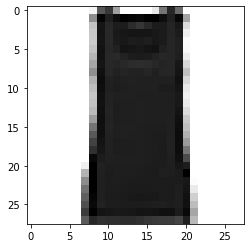

LABEL: 3
large_NN_prediction: 

INPUT:


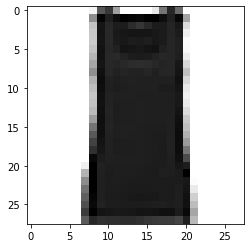

LABEL: 0


In [95]:
NN_prediction = mlp_best.predict(X_test)
large_NN_prediction = mlp_best_larger.predict(X_test)


for i in range(len(X_test)):
    if NN_prediction[i] == large_NN_prediction[i]:
        pass
    else:
        print(i)
        print("NN_prediction: \n")
        plot_input(X_test,NN_prediction,i)
        print("large_NN_prediction: \n")
        plot_input(X_test,large_NN_prediction,i)
        break

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 5000 data points. The code is already provided, just fix variable names (e.g., replace mlp ,  mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


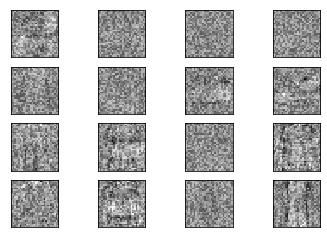

Weights with 5000 data points:


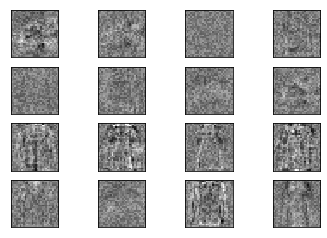

In [98]:
# The code is already provided, fix variable names in order to have it working with your implementation

print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_best.coefs_[0].min(), mlp_best.coefs_[0].max()
for coef, ax in zip(mlp_best.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 5000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_best_larger.coefs_[0].min(), mlp_best_larger.coefs_[0].max()
for coef, ax in zip(mlp_best_larger.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 4

Describe what do you observe by looking at the weights

## [ANSWER TO QUESTION 4]
The weights for the 5000 data points seem more defined and less 'noisy'

### TO DO 9

Report the best SVM model and its parameters, you found in the last notebook (or check out the solution on the moodle webpage of the course). Fit it on a few data points and compute its training and test scores.

In [100]:
from sklearn import svm

m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting

best_SVM = svm.SVC(C=0.05, kernel='poly', degree=3, gamma=0.05)

best_SVM.fit(X_train, y_train)

print ('RESULTS FOR SVM')

SVM_training_error = 1. - best_SVM.score(X_train,y_train)

print("Training score SVM:")
print(SVM_training_error)

SVM_test_error = 1. - best_SVM.score(X_test,y_test)
print("Test score SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training score SVM:
0.035599999999999965
Test score SVM:
0.17120000000000002


## QUESTION 5
Compare the results of SVM and of NN. Which one would you prefer? 

## [ANSWER TO QUESTION 5]
Both the training and test error of the SVM are worse than the NN errors, therefore I would prefer the NN if I have to decide only based on the errors. Although, the errors of the SVM are only slightly worse than the NN ones, therefore for a task like this I would prefer the SVM because is faster and has a lower computational cost.